In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from utils.statistics import check_normality, check_homoscedasticity, check_group_difference

## ARIMA

### Order & Seasonal Order

In [2]:
autoarima = pd.read_csv("../results/tuning/auto_arima.csv", sep=";")
print(autoarima["LookBackWindowSize"].unique())
print(autoarima["SeasonalPeriod"].unique())

[ 260  520 1040 1300]
[1 5]


In [3]:
lbws = 1300
sp = 5
tmp = autoarima[(autoarima["LookBackWindowSize"]==lbws) & (autoarima["SeasonalPeriod"]==sp)]
for col in tmp.columns[:-3]:
    print(tmp[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

p
0    67.6%
1    17.6%
2     8.8%
3     5.9%
Name: proportion, dtype: object
d
0    100.0%
Name: proportion, dtype: object
q
0    61.8%
1    17.6%
2    14.7%
3     5.9%
Name: proportion, dtype: object
P
0    88.2%
1     8.8%
2     2.9%
Name: proportion, dtype: object
D
0    100.0%
Name: proportion, dtype: object
Q
0    82.4%
2    14.7%
1     2.9%
Name: proportion, dtype: object


### Hyperparameters

In [4]:
arima = pd.read_csv("../results/tuning/arima.csv", sep=";")
metric = "F1-Score"
assert check_normality(arima[metric])
for hparam in ["Normalization", "SeasonalPeriod", "LookBackWindowSize"]:
    assert check_homoscedasticity(*[arima[arima[hparam]==val][metric] for val in arima[hparam].unique()])

#### Min-Max Normalization

Significant group difference: False
Normalization
False    36
True     36
Name: F1-Score, dtype: int64


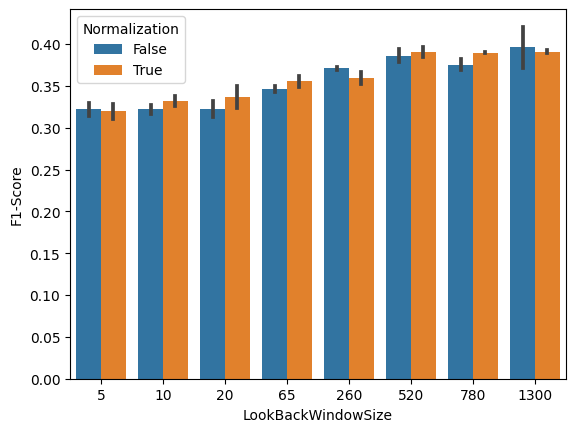

In [5]:
print("Significant group difference:", check_group_difference(arima[arima["Normalization"]==True][metric], arima[arima["Normalization"]==False][metric]))
print(round(arima.groupby("Normalization")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y="F1-Score", hue="Normalization", data=arima);

#### Seasonal Period

Significant group difference: False
SeasonalPeriod
0    36
5    36
Name: F1-Score, dtype: int64


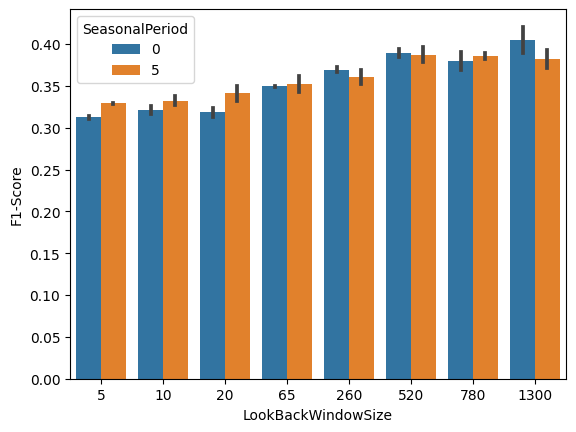

In [6]:
print("Significant group difference:", check_group_difference(arima[arima["SeasonalPeriod"]==0][metric], arima[arima["SeasonalPeriod"]==5][metric]))
print(round(arima.groupby("SeasonalPeriod")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y="F1-Score", hue="SeasonalPeriod", data=arima);

#### Look Back Window Size

Significant group difference: True
LookBackWindowSize
5       32
10      33
20      33
65      35
260     37
520     39
780     38
1300    39
Name: F1-Score, dtype: int64


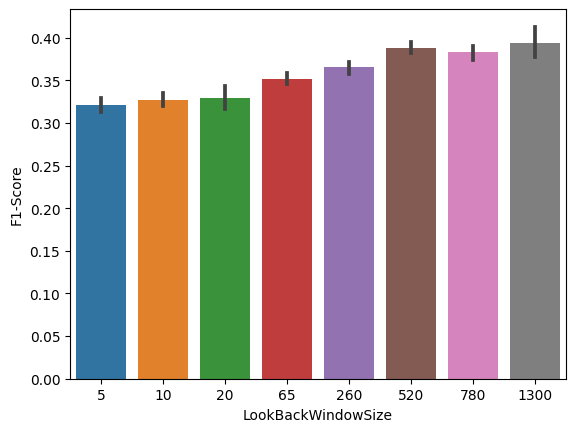

In [7]:
print("Significant group difference:", check_group_difference(*[arima[arima["LookBackWindowSize"]==val][metric] for val in arima["LookBackWindowSize"].unique()]))
print(round(arima.groupby("LookBackWindowSize")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y="F1-Score", data=arima);

### Conclusion
- According to auto_arima, the optimal order is (0,0,0)x(0,0,0), which is represents white noise, thus supporting the efficient market hypothesis.
- For 15-30% of trials, orders (1,0,0) and (0,0,1) might also be viable, i.e., Autoregression and Moving Average, respectively.
- Normalization (on vs off) and Seasonal Period (0 vs 5) do not significantly affect F1 scores.
- T, the length of the time series used for fitting (here, Look Back Window Size) makes a significant difference: the longer, the better.